https://twitter.com/Afstuyck/status/1681711376715087873

<img src="img/double_money.png"></img>

In [43]:
import random

import matplotlib.pyplot as plt

In [74]:
def toss_coin():
    return random.choice(['heads', 'tails'])

def play_round(players):
    for player in players:
        coin_result = toss_coin()
        if coin_result == 'heads':
            player['money'] *= 2
            player['heads'] += 1
        else:
            player['money'] /= 2
        #player['balance_history'].append(player['money'])

def simulate_game(num_players, num_rounds, initial_money):
    players = [{'player_id': i + 1, 'money': initial_money, 'heads': 0, 'balance_history': []} for i in range(num_players)]

    for round_num in range(num_rounds):
        play_round(players)

    return players

def print_statistics(final_bankrolls):
    avg_bankroll = sum(final_bankrolls) / len(final_bankrolls)
    median_bankroll = sorted(final_bankrolls)[len(final_bankrolls) // 2]
    max_bankroll = max(final_bankrolls)
    min_bankroll = min(final_bankrolls)

    # Calculate percentage with more than the starting bankroll
    more_than_starting = sum(bankroll > 100 for bankroll in final_bankrolls)
    percent_more_than_starting = (more_than_starting / len(final_bankrolls)) * 100

    # Calculate percentage that are 0
    num_zero_bankrolls = final_bankrolls.count(0)
    percent_zero_bankrolls = (num_zero_bankrolls / len(final_bankrolls)) * 100

    # Print statistics in a nice format
    print("Statistics of Final Bankrolls:")
    print(f"Average: ${avg_bankroll:.2f}")
    print(f"Median: ${median_bankroll:.2f}")
    print(f"Maximum: ${max_bankroll:.2f}")
    print(f"Minimum: ${min_bankroll:.2f}")
    print(f"Percentage with more than starting bankroll: {percent_more_than_starting:.2f}%")
    print(f"Percentage that are 0: {percent_zero_bankrolls:.2f}%")

def plot_time_series(player):
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(player['balance_history'])), player['balance_history'])
    plt.xlabel('Round')
    plt.ylabel('Balance')
    plt.title(f'Time Series of Player {player["player_id"]}')
    plt.grid(True)
    plt.show()

In [75]:
num_players = 250
num_rounds = 5000
initial_money = 100

players = simulate_game(num_players, num_rounds, initial_money)
players.sort(key=lambda x: x['money'], reverse=True)
richest_player = players[0]
final_bankrolls = [player['money'] for player in players]
final_bankrolls = [round(bankroll, 2) for bankroll in final_bankrolls]

print_statistics(final_bankrolls)

Statistics of Final Bankrolls:
Average: $inf
Median: $104857600.00
Maximum: $inf
Minimum: $0.00
Percentage with more than starting bankroll: 51.20%
Percentage that are 0: 48.40%


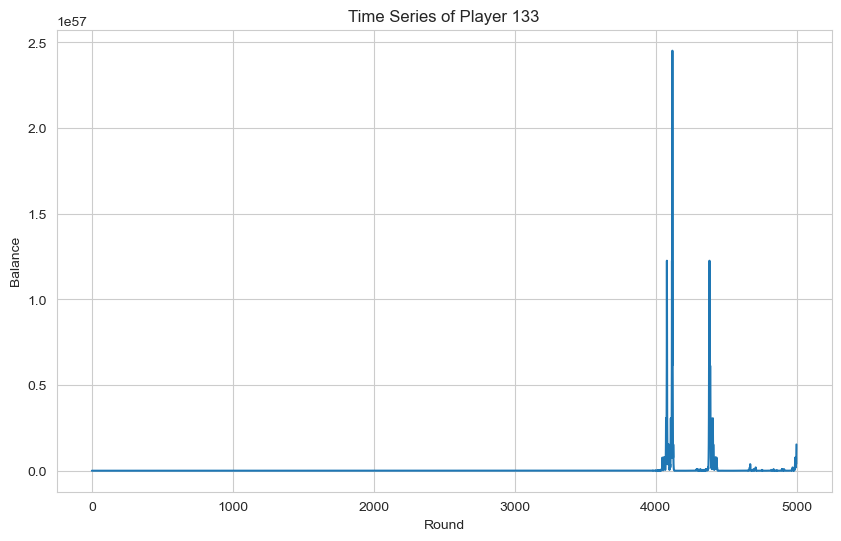

In [71]:
plot_time_series(richest_player)